# <a id="#">Task 3 – Mean, median, and Gaussian filtering</a>

In [3]:
import numpy
import matplotlib.pyplot as plt

---

## Linear filtering by convolution (mean filter)

**<a id="#">Task 3.1.1.</a>** Load the image `data/lena.png` and show it:

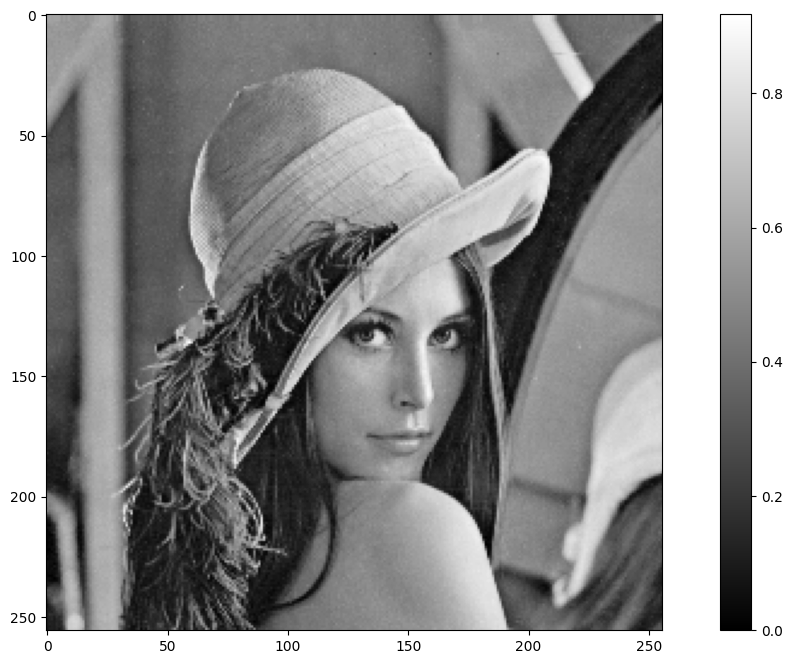

In [4]:
img = plt.imread('data/lena.png')
plt.figure(figsize=(15,8))
plt.imshow(img, 'gray')
plt.colorbar()

In [5]:
lena = img.copy()

**<a id="#">Task 3.1.2.</a>** Implement a mean filter:

In [6]:
def meanfilter(img, size):
    result = numpy.zeros(img.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img.shape):
        neighborhood_sum = 0
        for q in numpy.ndindex(size, size):
            # write your code here
            if p[0]>=n and p[1]>=n and p[0]<img.shape[0]-n and p[1]<img.shape[1]-n: 
                neighborhood_sum += img[(p[0]+ q[0]-n), (p[1] + q[1]-n)]
                result[p] = neighborhood_sum/(size)**2
            else: 
                result[p]=0                    

           
        # ...
    # write your code here
    return result

**<a id="#">Task 3.1.3.</a>** Test your implementation from above by using the function `meanfilter` for the previously loaded image and show the result:

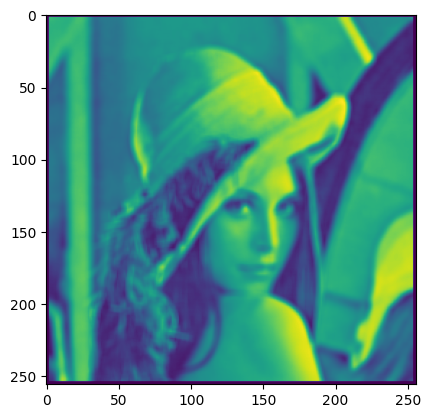

In [7]:
plt.imshow(meanfilter(lena,5))

**<a id="#">Task 3.1.4.</a>** Compare your result for filter size `5` with the correct result image `data/lena_meanfilter5.png`:

True

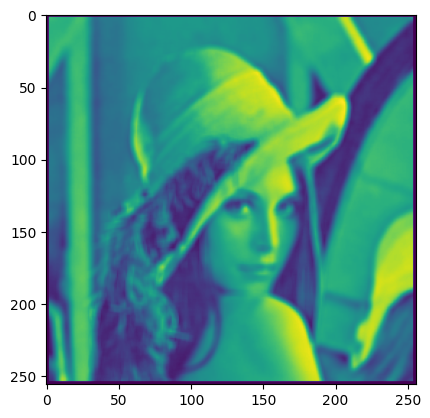

In [8]:
lenameanfilter5 = plt.imread('data/lena_meanfilter5.png')
plt.imshow(lenameanfilter5)
#assert
numpy.allclose(lenameanfilter5, meanfilter(lena,5), atol = 1/255)

---

## Non-linear filtering

**<a id="#">Task 3.2.1.</a>** Implement a median filter:

In [22]:
def medianfilter(img, size):
    result = numpy.zeros(img.shape)
    # write your code here
    n = (size - 1) // 2
    for p in numpy.ndindex(img.shape):
        #neighborhood_sum = 0
        neighborhood_list= list()
        if p[0]>=n and p[1]>=n and p[0]<img.shape[0]-n and p[1]<img.shape[1]-n: 
            for q in numpy.ndindex(size, size):
                y=p[0]-n+q[0]
                x=p[1]-n+q[1]
            # write your code here
            #if p[0]>=n and p[1]>=n and p[0]<img.shape[0]-n and p[1]<img.shape[1]-n: 
                #neighborhood_sum += img[(p[0]+ q[0]-n), (p[1] + q[1]-n)]
                #neighborhood_list.append(neighborhood_sum)
                #neighborhood_list=sorted(neighborhood_list)
                neighborhood_list.append(img[x,y])
                neighborhood_list=sorted(neighborhood_list)
                result[p] = neighborhood_list[(size**2) // 2]#(size)**2/2]
                #)= result[p] = neighborhood_sum/(size)**2
                #sort(result)
    return result
        #else: 
            #result[p]=0                    
        # ...
    # write your code here
    #return result
    #return result

**<a id="#">Task 3.2.2.</a>** First, test your implementation from above by using the function `medianfilter` for the previously loaded image and show the result:

In [23]:
lena2 = img.copy()
plt.imshow(medianfilter(lena2,5))

IndexError: list index out of range

Then, compare your result for filter size `5` with the correct result image `data/lena_medianfilter5.png`:

NameError: name 'medianfilter' is not defined

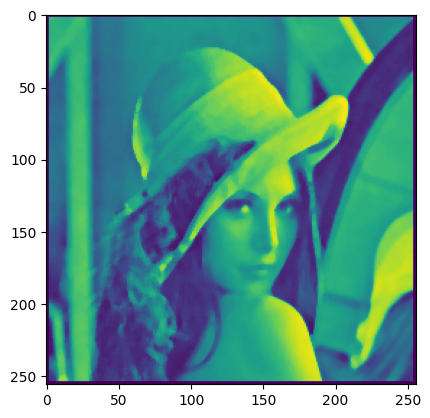

In [8]:
lenamedianfilter5 = plt.imread('data/lena_medianfilter5.png')
plt.imshow(lenamedianfilter5)
#assert
numpy.allclose(lenamedianfilter5, medianfilter(lena,5), atol = 1/255)

---

## Using pre-implemented filters

**<a id="#">Task 3.3.1.</a>** Load the package `scipy.ndimage`:

In [14]:
import scipy.ndimage

**<a id="#">Task 3.3.2 (a).</a>** Apply a **mean filter** from `scipy.ndimage` to the loaded image:

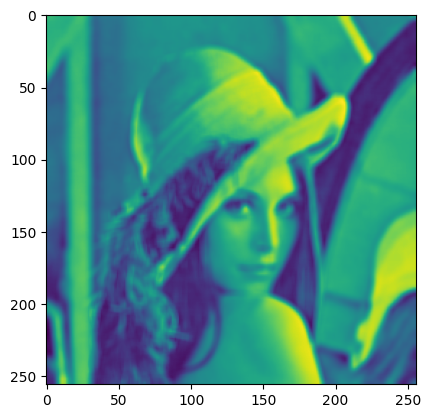

In [15]:
lena_mean = img.copy()
mean_scipy = scipy.ndimage.uniform_filter(lena_mean,5)
plt.imshow(mean_scipy)


**<a id="#">Task 3.3.2 (b).</a>** Apply a **median filter** from `scipy.ndimage` to the loaded image:

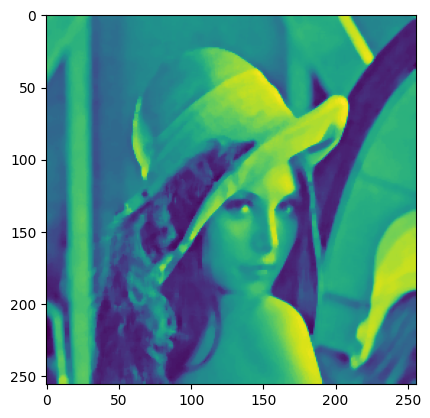

In [16]:
lena_median = img.copy()
median_scipy = scipy.ndimage.median_filter(lena_median,5)
plt.imshow(median_scipy)


**<a id="#">Task 3.3.2 (c).</a>** Apply a **Gaussian filter** from `scipy.ndimage` to the loaded image:

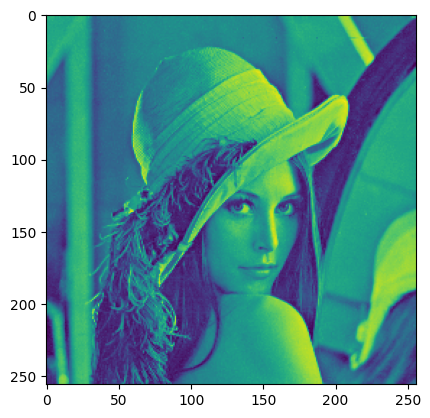

In [18]:
lena_gauss = img.copy()
Gauss_scipy = scipy.ndimage.gaussian_filter(lena_gauss,0.1)
plt.imshow(Gauss_scipy)
#sigma kleiner = steiler => näher an normalem Bild 
# Do I have to define the value of sigma? Does img, sigma // img, size also work?

**<a id="#">Task 3.3.3.</a>** Compare the results obtained using the functions from `scipy.ndimage` with those you obtained using your own implementations. What are the main differences? Do you have an explanation?

Kein Rand beim vorimplementierten Bild

---

## Slicing and benchmarking

**<a id="#">Task 3.4.2.</a>** Implement either a mean filter or a median filter using only a single `for`-loop:

In [ ]:
def fastfilter(img, size):
    # write your code here

**<a id="#">Task 3.4.3.</a>** First, test your implementation from above by using the function `fastfilter` for the previously loaded image and show the result:

Then, compare your result to those obtained using your implementation for either `meanfilter` or `medianfilter`, respectively:

**<a id="#">Task 3.4.4.</a>** Benchmark the code run times:

**<a id="#">Task 3.4.5.</a>** Document your observations regarding the benchmarking results and try to think of an explanation: